In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

import data_utils as data_utils

dataset = pd.read_csv("datasets/dataset_clean.csv")

dataset['RIESGO_VIDA'] = dataset['RIESGO_VIDA'].apply(lambda x: 1 if x == 'si' else 0)

labels = dataset[['RIESGO_VIDA']]
features = dataset.drop(['RIESGO_VIDA'], axis = 1)

print(dataset.shape)
dataset.head()

(281311, 29)


,RIESGO_VIDA,CIE_10,AFEC_TIPOPER,ENT_TIPOVIG,AFEC_MPIO,AFEC_PARENTESCO,AFEC_EDADR,AFEC_POBESPECIAL,COD_MACROMOT,ENT_COD_MPIO,...,COD_MOTGEN,PET_COD_DEPTO,AFEC_EDUC,PQR_TIPOPETICION,PET_MPIO,AFEC_GENERO,PQR_CANAL,PET_TIPOPER,AFEC_REGAFILIACION,AFEC_DPTO
0,0,otra atención médica,natural,regimen subsidiado,bogotá,otro,de 13 a 17 años,no aplica,1.0,63130.0,...,101.0,11.0,ninguno,reclamo,bogotá,mujer,escrito,juridica,subsidiado,bogota d.c.
1,0,"asma, no especificada",natural,regimen contributivo,cali,abuelo (a),de 13 a 17 años,no aplica,1.0,76001.0,...,103.0,76.0,secundaria,reclamo,cali,hombre,telefonico,natural,contributivo,valle
2,0,agentes virales como causa de enfermedades cla...,natural,regimen contributivo,neiva,padre,de 13 a 17 años,no aplica,1.0,41001.0,...,106.0,41.0,universitario incompleto,reclamo,neiva,hombre,personalizado,natural,contributivo,huila
3,1,epilepsia y sindromes epilepticos idiopaticos ...,natural,regimen contributivo,dosquebradas,padre,de 13 a 17 años,persona en condición de discapacidad,1.0,66001.0,...,101.0,66.0,ninguno,reclamo,dosquebradas,hombre,personalizado,natural,contributivo,risaralda
4,0,otra atención médica,natural,regimen subsidiado,bogotá,otro,de 13 a 17 años,no aplica,1.0,11001.0,...,106.0,11.0,ninguno,reclamo,bogotá,hombre,escrito,juridica,subsidiado,bogota d.c.


In [78]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

def categorize(df, column, bins):
    data = pd.cut(np.array(df[column]),  bins=bins)
    data = pd.Series(data)
    data = pd.DataFrame(data, columns=[f'{column}_Range'])
    data = data[f'{column}_Range'].apply(lambda value: str(value).replace('(', '').replace(']', '').replace(', ', '_'))

    df = df.join(pd.DataFrame(data, columns=[f'{column}_Range']))
    df = df.join(pd.get_dummies(df[f'{column}_Range']))
    df = df.drop([column], axis = 1)
    return df.drop([f'{column}_Range'], axis = 1)

def one_hot_encode(df, column):
    df = df.join(pd.get_dummies(df[column], prefix = column))
    return df.drop([column], axis = 1)  

def label_encode(df, column):
    le = preprocessing.LabelEncoder()
    values = list(df[column].values)
    le.fit(values)
    df[column] = le.transform(values)
    return df

def scale_normalize(df, columns):
    df[columns] = MinMaxScaler().fit_transform(df[columns])
    for column in columns:
        df[column] = df[column].apply(lambda x: np.log(x + 1))
    return df

def clean_ticket(text):
    text = text.lower()
    return re.sub(r"[^a-zA-Z0-9 ]", "", text)



In [81]:
columns = [
    'AFEC_EDADR', 
    'AFEC_EDUC', 
    'AFEC_GENERO', 
    'AFEC_GETNICO', 
    'AFEC_PARENTESCO', 
    'AFEC_POBESPECIAL', 
    'AFEC_REGAFILIACION',
    'AFEC_TIPOPER',
    'PET_TIPOPER',
    'PQR_CANAL',
    'RIESGO_VIDA',
    'TRIM'
]
print(f'columns: {dataset.columns}')
for column in columns:
    print(f'{column}: {set(dataset[column].values)}')
      

columns: Index(['RIESGO_VIDA', 'CIE_10', 'AFEC_TIPOPER', 'ENT_TIPOVIG', 'AFEC_MPIO',
       'AFEC_PARENTESCO', 'AFEC_EDADR', 'AFEC_POBESPECIAL', 'COD_MACROMOT',
       'ENT_COD_MPIO', 'ENT_COD_SNS', 'ENT_TIPOVIG_SNS', 'TRIM', 'MES',
       'COD_MOTESP', 'AFEC_GETNICO', 'ENT_COD_DEPTO', 'PQR_CLASE_SNS',
       'PATOLOGIA_TIPO', 'COD_MOTGEN', 'PET_COD_DEPTO', 'AFEC_EDUC',
       'PQR_TIPOPETICION', 'PET_MPIO', 'AFEC_GENERO', 'PQR_CANAL',
       'PET_TIPOPER', 'AFEC_REGAFILIACION', 'AFEC_DPTO'],
      dtype='object')
AFEC_EDADR: {'de 0 a 5 años', 'de 18 a 24 años', 'de 38 a 49 años', 'de 25 a 29 años', 'de 13 a 17 años', 'de 6 a 12 años', 'de 50 a 62 años', 'mayor de 63 años', 'de 30 a 37 años'}
AFEC_EDUC: {'primaria incompleta', 'universitario', 'universitario incompleto', 'secundaria', 'posgrado', 'primaria', 'ninguno', 'secundaria incompleta'}
AFEC_GENERO: {'hombre', 'mujer'}
AFEC_GETNICO: {'palanquero (de san basilio)', 'negro', 'raizal (del archipiélago de san andrés y providencia)',

In [83]:
list(set(dataset.columns) - set(columns))

['AFEC_DPTO',
 'COD_MOTGEN',
 'COD_MACROMOT',
 'ENT_COD_SNS',
 'AFEC_MPIO',
 'ENT_COD_DEPTO',
 'ENT_TIPOVIG',
 'PQR_CLASE_SNS',
 'CIE_10',
 'PET_COD_DEPTO',
 'PET_MPIO',
 'COD_MOTESP',
 'ENT_COD_MPIO',
 'ENT_TIPOVIG_SNS',
 'PQR_TIPOPETICION',
 'PATOLOGIA_TIPO',
 'MES']

In [84]:
def pre_process(df, train = True):
    
        df = label_encode(df, 'AFEC_EDADR')
        df = one_hot_encode(df, 'AFEC_EDADR')
        df = label_encode(df, 'AFEC_EDUC')
        df = one_hot_encode(df, 'AFEC_EDUC')
        
        df = one_hot_encode(df, 'AFEC_GENERO')
        
        df = label_encode(df, 'AFEC_GETNICO')
        df = one_hot_encode(df, 'AFEC_GETNICO')
        
        df = label_encode(df, 'AFEC_PARENTESCO')
        df = one_hot_encode(df, 'AFEC_PARENTESCO')

        df = label_encode(df, 'AFEC_POBESPECIAL')
        df = one_hot_encode(df, 'AFEC_POBESPECIAL')
 
        df = one_hot_encode(df, 'AFEC_REGAFILIACION')
        df = one_hot_encode(df, 'AFEC_TIPOPER')
        df = one_hot_encode(df, 'PET_TIPOPER')
        df = one_hot_encode(df, 'PQR_CANAL')
        df = one_hot_encode(df, 'RIESGO_VIDA')
        df = one_hot_encode(df, 'TRIM')
    
        
        #df = one_hot_encode(df, 'PQR_TIPOATENCION')

        if(train == True):
            df = df.drop_duplicates()

        encoded_columns = ['AFEC_DPTO',
             'COD_MOTGEN',
             'COD_MACROMOT',
             'ENT_COD_SNS',
             'AFEC_MPIO',
             'ENT_COD_DEPTO',
             'ENT_TIPOVIG',
             'PQR_CLASE_SNS',
             'CIE_10',
             'PET_COD_DEPTO',
             'PET_MPIO',
             'COD_MOTESP',
             'ENT_COD_MPIO',
             'ENT_TIPOVIG_SNS',
             'PQR_TIPOPETICION',
             'PATOLOGIA_TIPO',
             'MES']
        for column in encoded_columns:
            df = label_encode(df, column)
            
        df = scale_normalize(df, encoded_columns)
        return df

In [85]:
nulls = set(dataset.columns[dataset.isnull().mean() > 0])
print(len(nulls))
print(nulls)


0
set()


## Encoding dataset
All features in the dataset are categorical. Some of them have too many classes to be one hot encoded. Mean encoding transformation will be perform on the dataset to encode features.

In [86]:
encoded_features = pre_process(dataset)
display(encoded_features.head())  


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,CIE_10,ENT_TIPOVIG,AFEC_MPIO,COD_MACROMOT,ENT_COD_MPIO,ENT_COD_SNS,ENT_TIPOVIG_SNS,MES,COD_MOTESP,ENT_COD_DEPTO,...,PQR_CANAL_escrito,PQR_CANAL_personalizado,PQR_CANAL_telefonico,PQR_CANAL_web,RIESGO_VIDA_0,RIESGO_VIDA_1,TRIM_trim i,TRIM_trim ii,TRIM_trim iii,TRIM_trim iv
0,0.439448,0.542324,0.093699,0.0,0.554807,0.527020,0.587787,0.0,0.046061,0.435318,...,1,0,0,0,1,0,1,0,0,0
1,0.067159,0.470004,0.121177,0.0,0.644893,0.335013,0.530628,0.0,0.219771,0.528844,...,0,0,1,0,1,0,1,0,0,0
2,0.022458,0.470004,0.434038,0.0,0.439097,0.398639,0.530628,0.0,0.390767,0.310155,...,0,1,0,0,1,0,1,0,0,0
3,0.245190,0.470004,0.229884,0.0,0.560149,0.342286,0.530628,0.0,0.058841,0.454736,...,0,1,0,0,0,1,1,0,0,0
4,0.439448,0.542324,0.093699,0.0,0.129325,0.544931,0.587787,0.0,0.386201,0.058841,...,1,0,0,0,1,0,1,0,0,0


## Store processed dataset

In [87]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

encoded_features['RIESGO_VIDA'] = labels

encoded_features.to_csv("datasets/encoded_dataset.csv", index = False)

## Post Processing Exploration

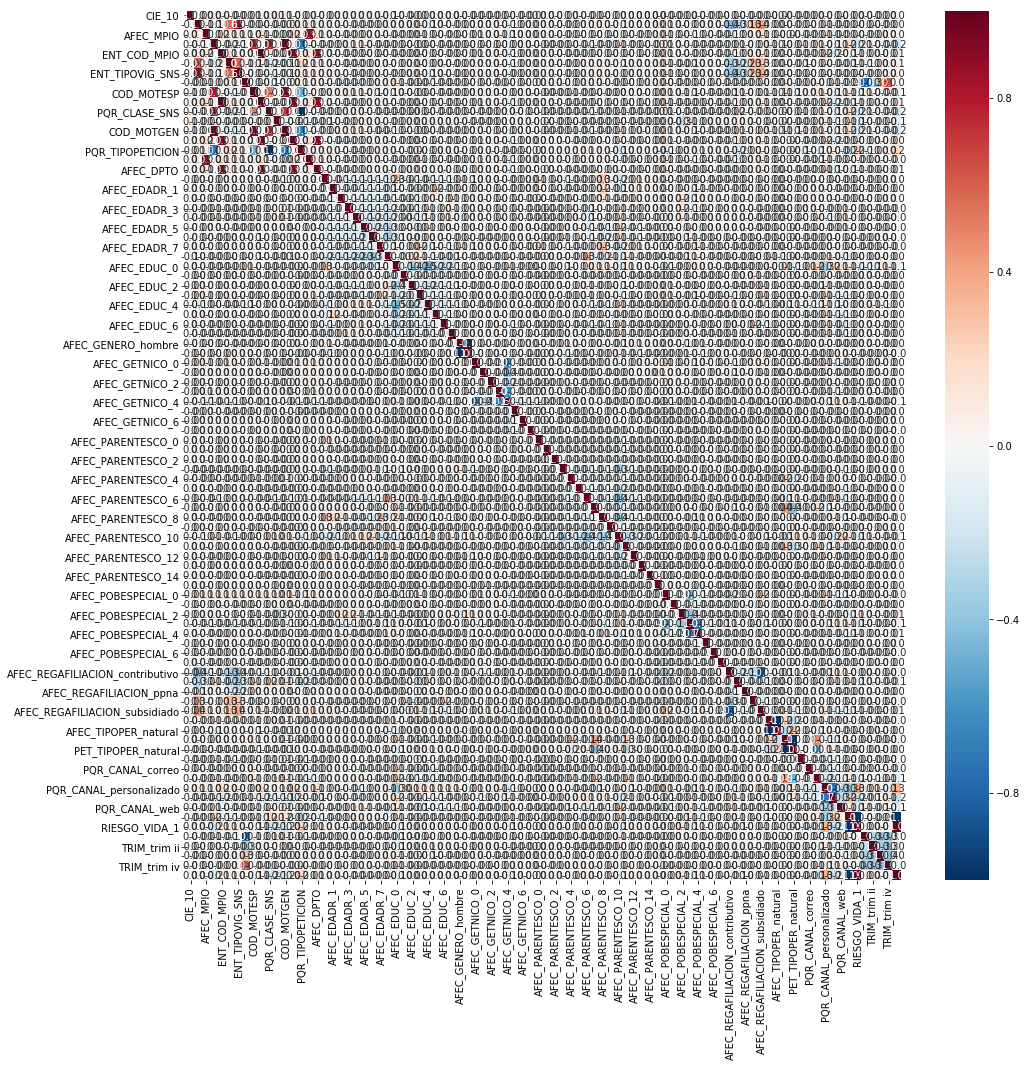

In [88]:
import seaborn as sns
plt.figure(figsize=(16, 16))

ax = sns.heatmap(encoded_features.corr(), cmap = "RdBu_r", annot=True, fmt='.1f')